In [9]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp37-cp37m-win_amd64.whl (423.2 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\nguye\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python37\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 115,306
Trainable params: 115,306
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=Adam(), loss = categorical_crossentropy, metrics=['acc'])

In [7]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 2s 2ms/step - loss: 0.9764 - acc: 0.8246 - val_loss: 0.2487 - val_acc: 0.9307
Epoch 2/10
844/844 [==============================] - 1s 2ms/step - loss: 0.2454 - acc: 0.9314 - val_loss: 0.2026 - val_acc: 0.9465
Epoch 3/10
844/844 [==============================] - 1s 2ms/step - loss: 0.1721 - acc: 0.9508 - val_loss: 0.1692 - val_acc: 0.9520
Epoch 4/10
844/844 [==============================] - 1s 2ms/step - loss: 0.1464 - acc: 0.9587 - val_loss: 0.1292 - val_acc: 0.9622
Epoch 5/10
844/844 [==============================] - 1s 1ms/step - loss: 0.1246 - acc: 0.9635 - val_loss: 0.1132 - val_acc: 0.9693
Epoch 6/10
844/844 [==============================] - 1s 1ms/step - loss: 0.1102 - acc: 0.9673 - val_loss: 0.1340 - val_acc: 0.9657
Epoch 7/10
844/844 [==============================] - 1s 1ms/step - loss: 0.0967 - acc: 0.9714 - val_loss: 0.1348 - val_acc: 0.9658
Epoch 8/10
844/844 [==============================] - 1s 2ms/step - loss: 0.

In [8]:
model.save('model.h5')

In [11]:
# load model khi da co model
model = tf.keras.models.load_model('model.h5')

In [12]:
# Test
import matplotlib.pyplot as plt

In [13]:
id_test = 100
img = x_test[id_test, :].reshape(1, -1)
label = np.argmax(y_test[id_test, :])
label

6

ket qua du doan: 6


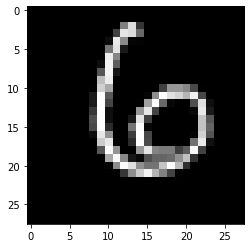

In [17]:
predict = model.predict(img)[0]
predict = np.argmax(predict)
print("ket qua du doan: " + str(predict))
plt.imshow(img.reshape(28, 28), cmap='gray')